# Apriori

## Importing the libraries

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=05135f99ef94c3b8d1845cf667410d322d7669bdcf566a9b4ec6cefee1caad9a
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preprocessing

In [ ]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
transactions = []
for i in range(0, 7501):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

In [ ]:
# Number of Transactions
num_transactions = dataset.shape[0]

# Number of Unique Items
unique_items = dataset.stack().nunique()

# Frequency of Items
item_counts = dataset.iloc[:, 0:].stack().value_counts()

# Print Summary Statistics
print("Summary Statistics:")
print("Number of Transactions:", num_transactions)
print("Number of Unique Items:", unique_items)
print("\nTop 10 Most Frequently Purchased Items:")
print(item_counts.head(10))

Summary Statistics:
Number of Transactions: 7501
Number of Unique Items: 120

Top 10 Most Frequently Purchased Items:
mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1230
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
dtype: int64


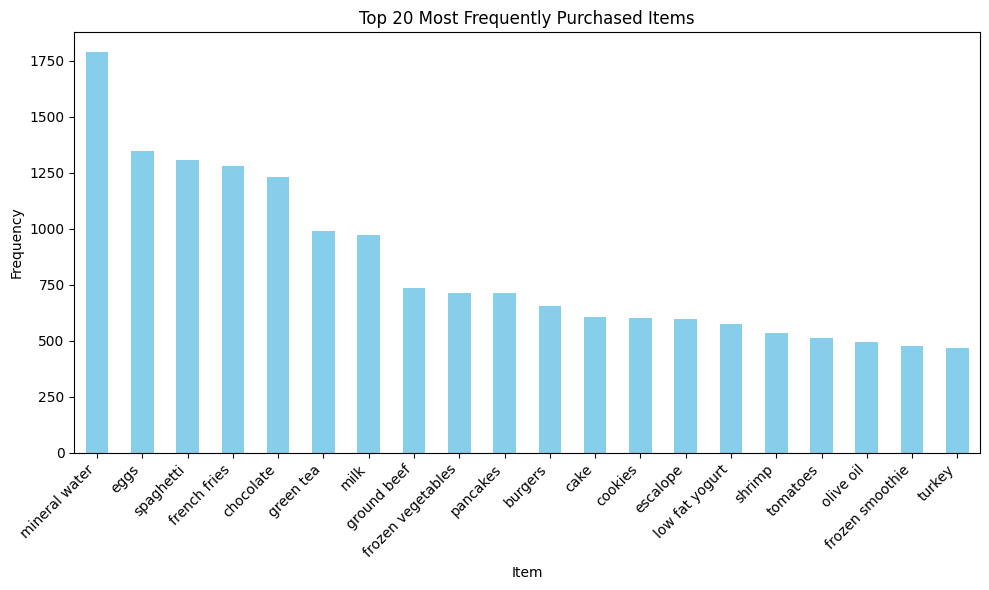

In [ ]:
item_counts = dataset.iloc[:, 0:].stack().value_counts()
plt.figure(figsize=(10, 6))
item_counts.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequently Purchased Items')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

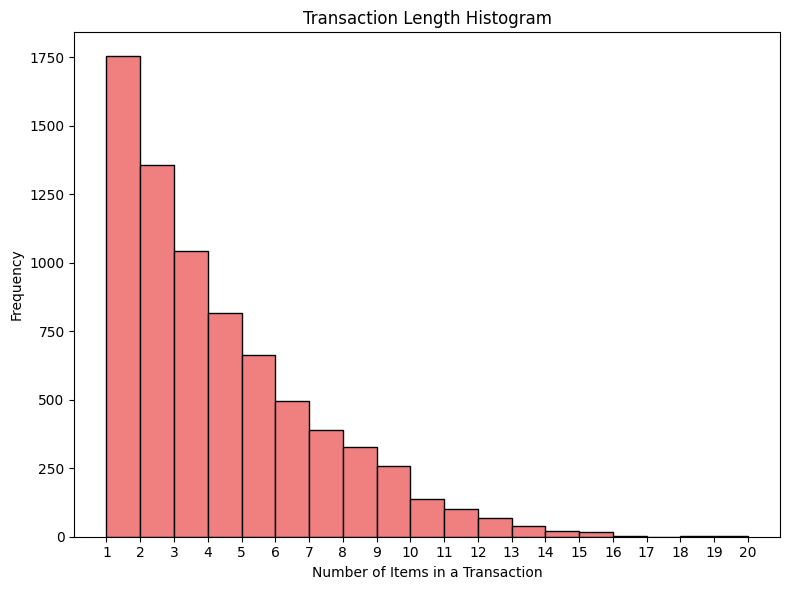

In [ ]:
transaction_lengths = dataset.apply(lambda row: row.count(), axis=1)
plt.figure(figsize=(8, 6))
plt.hist(transaction_lengths, bins=range(1, 21), edgecolor='black', color='lightcoral')
plt.title('Transaction Length Histogram')
plt.xlabel('Number of Items in a Transaction')
plt.ylabel('Frequency')
plt.xticks(range(1, 21))
plt.tight_layout()
plt.show()

## Training the Apriori model on the dataset

In [ ]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

## Visualising the results

### Displaying the first results coming directly from the output of the apriori function

In [ ]:
results = list(rules)

In [ ]:
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

### Putting the results well organised into a Pandas DataFrame

In [ ]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

### Displaying the results non sorted

In [ ]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


### Displaying the results sorted by descending lifts

In [ ]:
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


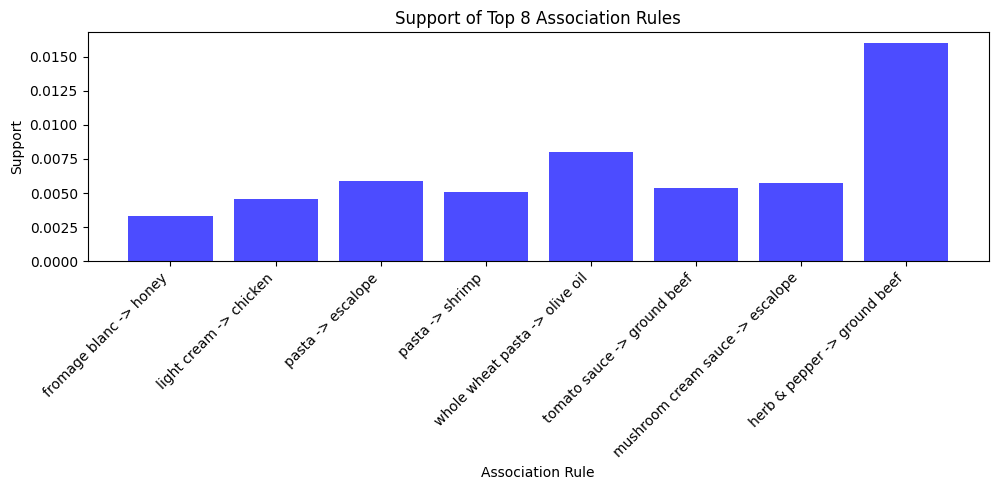

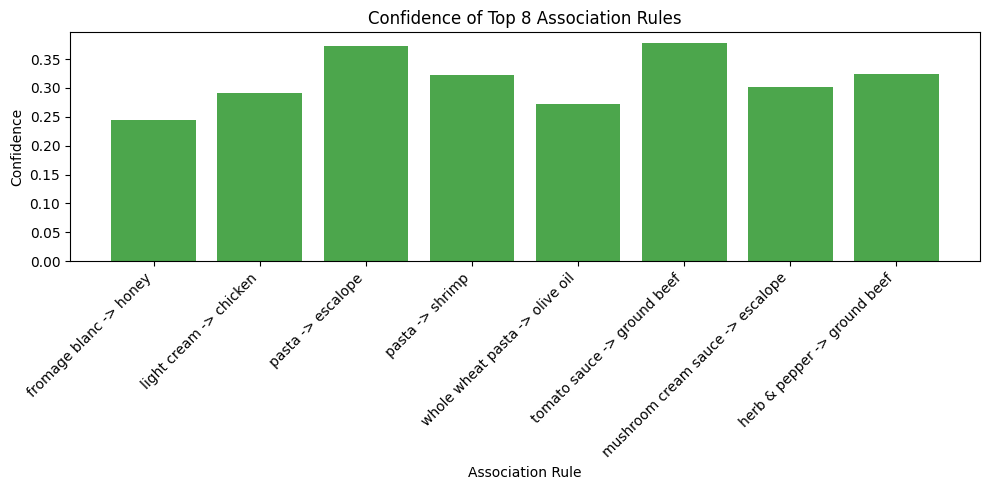

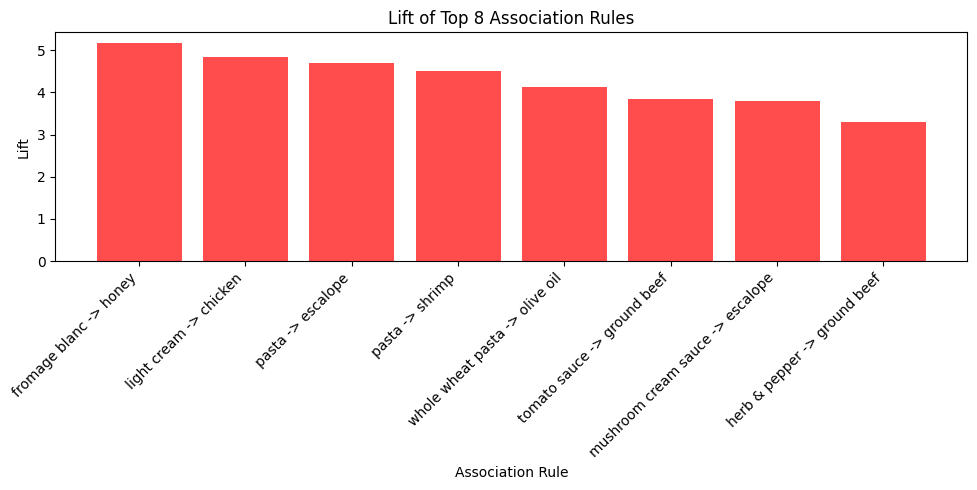

In [ ]:
import matplotlib.pyplot as plt

# Data for the top 8 association rules
association_rules_data = {
    'Association Rule': ['fromage blanc -> honey', 'light cream -> chicken', 'pasta -> escalope', 'pasta -> shrimp',
                         'whole wheat pasta -> olive oil', 'tomato sauce -> ground beef', 'mushroom cream sauce -> escalope',
                         'herb & pepper -> ground beef'],
    'Support': [0.003333, 0.004533, 0.005866, 0.005066, 0.007999, 0.005333, 0.005733, 0.015998],
    'Confidence': [0.245098, 0.290598, 0.372881, 0.322034, 0.271493, 0.377358, 0.300699, 0.323450],
    'Lift': [5.164271, 4.843951, 4.700812, 4.506672, 4.122410, 3.840659, 3.790833, 3.291994]
}

# Create DataFrame from the association_rules_data dictionary
association_rules_df = pd.DataFrame(association_rules_data)

# Visualize the top 8 association rules

# Bar plot for Support
plt.figure(figsize=(10, 5))
plt.bar(association_rules_df['Association Rule'], association_rules_df['Support'], color='b', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Association Rule')
plt.ylabel('Support')
plt.title('Support of Top 8 Association Rules')
plt.tight_layout()
plt.show()

# Bar plot for Confidence
plt.figure(figsize=(10, 5))
plt.bar(association_rules_df['Association Rule'], association_rules_df['Confidence'], color='g', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Association Rule')
plt.ylabel('Confidence')
plt.title('Confidence of Top 8 Association Rules')
plt.tight_layout()
plt.show()

# Bar plot for Lift
plt.figure(figsize=(10, 5))
plt.bar(association_rules_df['Association Rule'], association_rules_df['Lift'], color='r', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Association Rule')
plt.ylabel('Lift')
plt.title('Lift of Top 8 Association Rules')
plt.tight_layout()
plt.show()
